<a href="https://colab.research.google.com/github/the-nameshifter/Camilo/blob/Machine-Learning/Iris_plant_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Classification
The data contains 3 classes of 50 instances each, where each class refers to a type of iris plant. The attribute to be predictec is the class of iris plant. The classes are as follows: 1 Iris Setosa, 2 Iris Versicolour, 3 Iris Virginica.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
iris_dataF = pd.read_csv('/content/Iris.csv')

In [4]:
iris_dataF

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


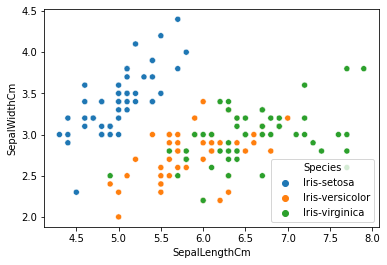

In [5]:
sns.scatterplot(x = 'SepalLengthCm', y = 'SepalWidthCm', hue = 'Species', data = iris_dataF)

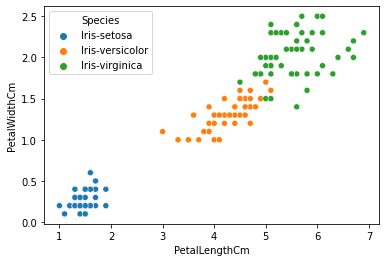

In [6]:
sns.scatterplot(x = 'PetalLengthCm', y = 'PetalWidthCm', hue = 'Species', data = iris_dataF)

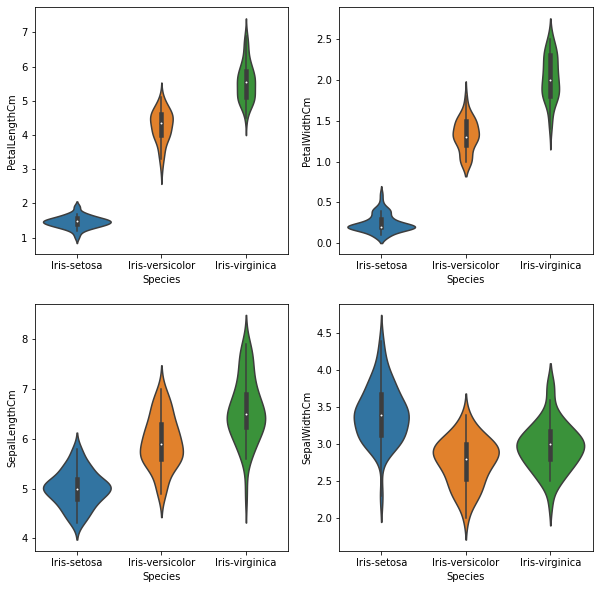

In [10]:
plt.figure (figsize= (10, 10))

plt.subplot(2, 2, 1)
sns.violinplot(x= 'Species', y= 'PetalLengthCm', data= iris_dataF )

plt.subplot(2, 2, 2)
sns.violinplot(x= 'Species', y= 'PetalWidthCm', data= iris_dataF )

plt.subplot(2, 2, 3)
sns.violinplot(x= 'Species', y= 'SepalLengthCm', data= iris_dataF )

plt.subplot(2, 2, 4)
sns.violinplot(x= 'Species', y= 'SepalWidthCm', data= iris_dataF )

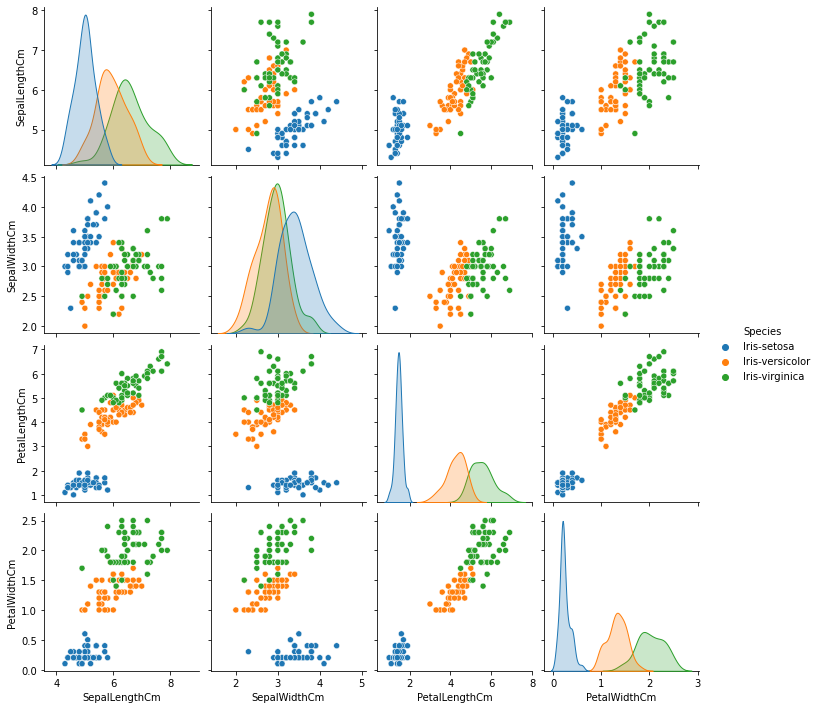

In [12]:
sns.pairplot(iris_dataF, hue = 'Species')

In [13]:
Correlations = iris_dataF.corr()


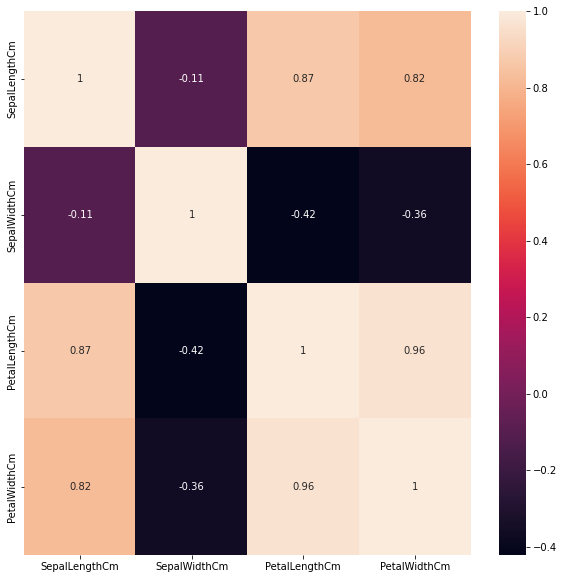

In [15]:

f, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(Correlations, annot = True)

# Data Cleaning

In [17]:
X = iris_dataF.drop(['Species'], axis = 1)

In [19]:
y = iris_dataF['Species']

In [20]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30 )

In [23]:
X_train.shape

(105, 4)

In [24]:
X_test.shape

(45, 4)

# Training the model

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,  confusion_matrix

In [26]:
classifier = KNeighborsClassifier(n_neighbors=5, metric= 'minkowski', p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
y_predict = classifier.predict(X_test)
y_predict

array(['Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

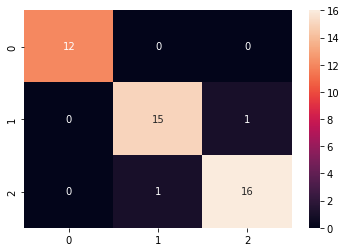

In [28]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

In [29]:
print(classification_report (y_test, y_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.94      0.94      0.94        16
 Iris-virginica       0.94      0.94      0.94        17

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45

